In [66]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"hwanghyeri","key":"af07790f76baf5359d1018a3900ee863"}'}

In [67]:
ls -1ha kaggle.json

kaggle.json


In [68]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [69]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [70]:
import torch
import torch.nn as nn # 신경망들이 포함됨
import torch.optim as optim # 최적화 알고리즘들이 포함힘
import torch.nn.init as init # 텐서에 초기값을 줌

import torchvision.datasets as datasets # 이미지 데이터셋 집합체
import torchvision.transforms as transforms # 이미지 변환 툴

from torch.utils.data import DataLoader # 학습 및 배치로 모델에 넣어주기 위한 툴

import numpy as np
import matplotlib.pyplot as plt

In [71]:
!ls  # 데이터가 다운로드 되면 !IS를 통해서 다운로드 된 모든 파일의 이름을 볼수있다.

 chest_xray		   'kaggle (1).json'   kaggle.json
 chest-xray-pneumonia.zip  'kaggle (2).json'   sample_data


In [72]:
!unzip chest-xray-pneumonia.zip

Archive:  chest-xray-pneumonia.zip
replace chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [73]:
transform =transforms.Compose([transforms.Resize([256, 256]), transforms.ToTensor()])

In [74]:
data_dir = "./chest_xray"

In [75]:
trainset = datasets.ImageFolder(root= data_dir + "/train/", transform=transform)
testset = datasets.ImageFolder(root= data_dir + "/test/", transform=transform)
valset = datasets.ImageFolder(root=data_dir + "/val/", transform=transform)

In [76]:
print(type(trainset), type(testset))
print(len(trainset), len(testset))

<class 'torchvision.datasets.folder.ImageFolder'> <class 'torchvision.datasets.folder.ImageFolder'>
5216 624


In [77]:
batch_size = 32 # 중요한 하이퍼 파라미터, 16 이하로 사용하는것이 성능에 좋다고 알려져 있음
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True) # 훈련용
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False) # 테스트용

In [78]:
print(type(trainloader), type(testloader))
print(len(trainloader), len(testloader))

<class 'torch.utils.data.dataloader.DataLoader'> <class 'torch.utils.data.dataloader.DataLoader'>
163 20


In [79]:
images, labels = iter(trainloader).next()
print(images.shape, labels.shape)

torch.Size([32, 3, 256, 256]) torch.Size([32])


In [80]:
import glob

In [81]:
from PIL import Image
import cv2

In [82]:
trainset[300][0] #  trainset.__getitem__(0)[0]과 동일 (image)

tensor([[[0.2510, 0.2863, 0.2745,  ..., 0.2510, 0.2392, 0.2275],
         [0.2549, 0.2902, 0.2902,  ..., 0.2471, 0.2353, 0.2157],
         [0.2549, 0.2941, 0.2941,  ..., 0.2431, 0.2275, 0.2078],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.2510, 0.2863, 0.2745,  ..., 0.2510, 0.2392, 0.2275],
         [0.2549, 0.2902, 0.2902,  ..., 0.2471, 0.2353, 0.2157],
         [0.2549, 0.2941, 0.2941,  ..., 0.2431, 0.2275, 0.2078],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.2510, 0.2863, 0.2745,  ..., 0.2510, 0.2392, 0.2275],
         [0.2549, 0.2902, 0.2902,  ..., 0.2471, 0.2353, 0.2157],
         [0.2549, 0.2941, 0.2941,  ..., 0.2431, 0.2275, 0.

<class 'torch.Tensor'>
torch.Size([3, 256, 256]) 0


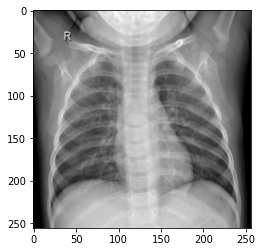

In [83]:
print(type(trainset[300][0]))
print(trainset[300][0].shape, trainset[300][1])
plt.imshow(trainset[300][0].permute(1, 2, 0))

<class 'torch.Tensor'>
torch.Size([3, 256, 256]) 0


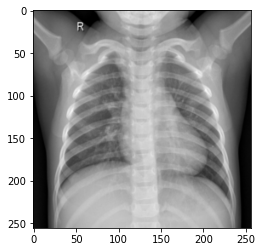

In [84]:
print(type(trainset[100][0]))
print(trainset[100][0].shape, trainset[100][1])
plt.imshow(trainset[100][0].permute(1, 2, 0))

In [85]:
import torch # 파이토치 기본 라이브러리 
import torchvision # 이미지 관련 된 파이토치 라이브러리
from torchvision import datasets # 토치비전에서 제공하는 데이터셋
from torchvision import transforms # 이미지 전처리 기능들을 제공하는 라이브러리
from torch.utils.data import DataLoader # 데이터를 모델에 사용할 수 있도록 적재해 주는 라이브러리
from torch.utils.data import random_split
import numpy as np 
import matplotlib.pyplot as plt
import cv2

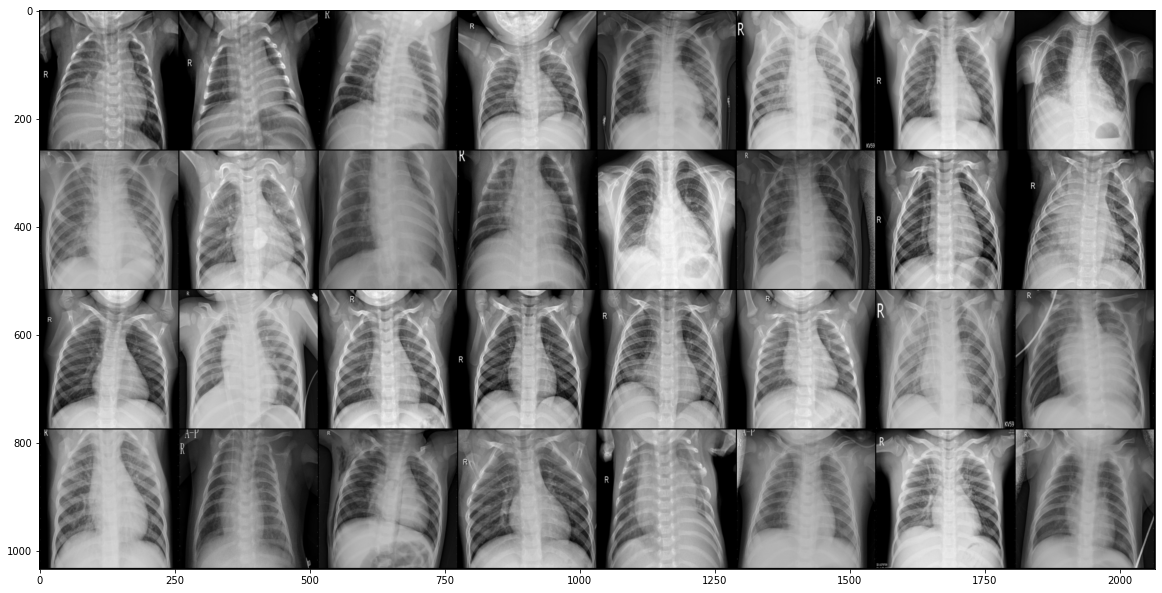

In [86]:
def imshow(img):         
    #img = img * 0.5 + 0.5 #unnormalize (normalize : (data - 0.5)/0.5))
    plt.figure(figsize=(20, 200))
    plt.imshow(img.permute(1, 2, 0))


dataiter = iter(trainloader)
images, labels = dataiter.next() # 32개의 image, 32개의 label

imshow(torchvision.utils.make_grid(images, nrows=8))

In [117]:
from torch.utils.data import Dataset

class ChestXray(Dataset):
  def __init__(self, root, transform):
    self.filepaths = glob.glob(root + "/*/*.jpeg")
    self.transform = transform

  def __len__(self):
    return len(self.filepaths)

  def __getitem__(self, index):
    img_path = self.filepaths[index]    
    # pytorch dataset에서는 image 데이터를 PIL 형태로 읽음
    # img = Image.open(img_path) # PIL type의 데이터가 img로 반환
    
    # albumentation 전처리기에서는 numpy array를 기대함
    img = cv2.imread(img_path) # numpy array 데이터가 img로 반환
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = np.expand_dims(img, 2)

    # torchvision 제공 전처리기
    # img_transformed = self.transform(img)

    # alubumentation 제공 전처리기
    img_transformed = self.transform(image=img)["image"]
    label = img_path.split('/')[-2] # label에는 "Dog" 또는 "Cat"이 들어가있음
    if label == "PNEUMONIA":
      label = 1
    else:
      label = 0    
    return img_transformed, label

In [140]:
import albumentations as A
from albumentations.pytorch import ToTensor

transform = A.Compose([A.Resize(224, 224), 
                       A.RandomBrightnessContrast(brightness_limit = 0.3, contrast_limit = 0.3, p = 0.5),
                       ToTensor()]) 

In [141]:
trainset = ChestXray(root= data_dir + "/train/", transform=transform)
testset = ChestXray(root= data_dir + "/test/", transform=transform)

In [142]:
print(len(trainset), len(testset))
print(type(trainset[0][0]), type(trainset[0][1]))
print(trainset[0][0].shape)

5216 624
<class 'torch.Tensor'> <class 'int'>
torch.Size([1, 224, 224])


In [143]:
batch_size = 32 # 중요한 하이퍼 파라미터, 16 이하로 사용하는것이 성능에 좋다고 알려져 있음
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True) # 훈련용
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False) # 테스트용

In [144]:
print(type(trainloader), type(testloader))
print(len(trainloader), len(testloader))

<class 'torch.utils.data.dataloader.DataLoader'> <class 'torch.utils.data.dataloader.DataLoader'>
163 20


In [145]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [146]:
print(images.shape)

torch.Size([32, 1, 224, 224])


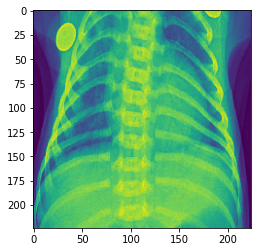

In [147]:
plt.imshow(images[0].permute(1,2,0).numpy().squeeze())

In [148]:
images[0].shape

torch.Size([1, 224, 224])

torch.Size([3, 906, 1810])


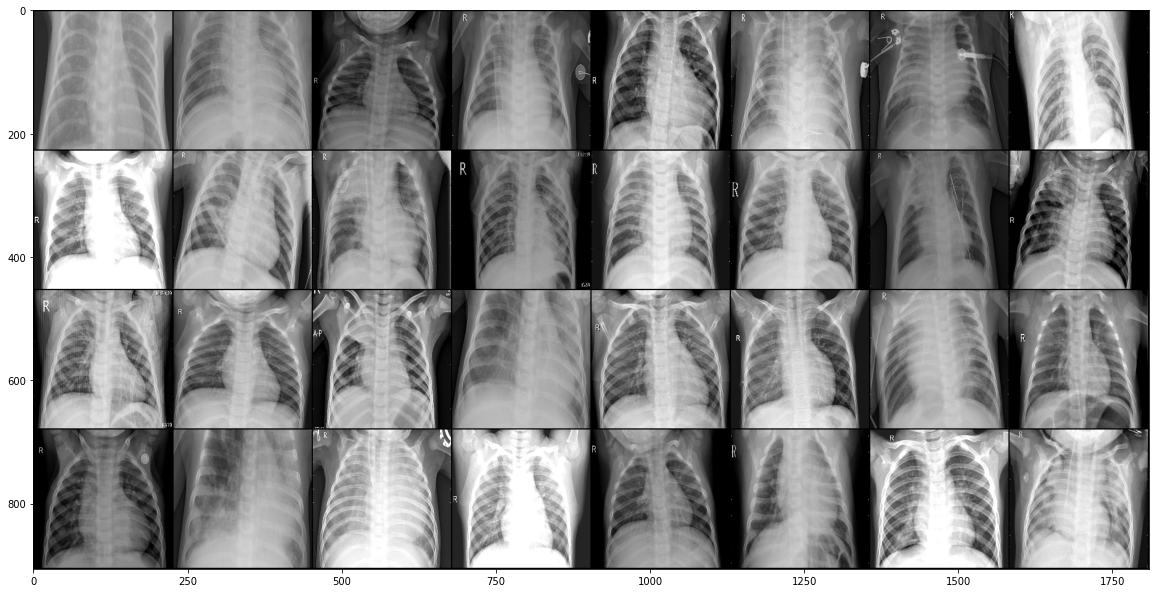

In [149]:
def imshow(img):  
    print(img.shape)       
    #img = img * 0.5 + 0.5 #unnormalize (normalize : (data - 0.5)/0.5))
    plt.figure(figsize=(20, 200))
    plt.imshow(img.permute(1, 2, 0).numpy().squeeze())


dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrows=8))

In [ ]:
#https://pseudo-lab.github.io/Tutorial-Book/chapters/object-detection/Ch3-preprocessing.html